# Actividad Final 5.21

Dibuja el ciclo frigorífico del R134a en su diagrama de Mollier a partir de los siguientes datos:
- Temperatura de condensación: 35 °C.
- Temperatura de evaporación: -5 °C.
- Temperatura a la entrada de la válvula de expansión: 25 °C.
- Temperatura en la aspiración del compresor: 5 °C.


In [2]:
import pyromat as pm
pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100
import warnings
warnings.filterwarnings('ignore')

El punto 1 tendrá el valor de la presión de evaporación y la temperatura será la temperatura de evaporación saturada de líquido más 5º de recalentamiento. Una vez obtenido el punto sobre el diagrama anotamos los valores de entropía y entalpía.

In [11]:
mp_R134a = pm.get("mp.C2H2F4")
T1 = -5+10 + 273.15 # K <--given
p_ev= mp_R134a.ps(T=-5+273.15)
h1 = mp_R134a.h(T=T1, p=p_ev)
s1 = mp_R134a.s(T=T1, p=p_ev)
print(f"Entalpía del punto 1: {round(float(h1),1)} kJ/kg")
print(f"Entropía del punto 1: {round(float(s1),4)} kJ/kg")

Entalpía del punto 1: 404.4 kJ/kg
Entropía del punto 1: 1.7619 kJ/kg


El punto 2 tendrá el valor de la presión de condensación y la entropía del puto 1. Este valor implica que la compresión  sea isoentrópica. 

In [5]:
T_con = 35 +273.15 # K <--given
p_g = mp_R134a.ps(T=T_con)
h2 = mp_R134a.h(s=s1, p=p_g)
T2 = mp_R134a.T(s=s1, p=p_g)
print(f"Presión punto 2: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 2: {round(float(h2),1)} kJ/kg")
print(f"Temperatura del punto 2: {round(float(T2-273.15),1)} ºC")


Presión punto 2: 886.9 KPa
Entalpía del punto 2: 432.7 kJ/kg
Temperatura del punto 2: 49.5 ºC


El punto 3 tendrá el valor de la presión de condensación y la temperatura será la temperatura de condensación menos el valor del subenfriamiento de líquido. Una vez dibujado, obtenemos la entalpía.

In [7]:
p_g = mp_R134a.ps(T=T_con)
print(f"Presión punto 3: {round(float(p_g),1)} KPa")
h3 = mp_R134a.h(T=T_con-10,p=p_g)
print(f"Entalpía del punto 3: {round(float(h3[0]),1)} kJ/kg")

Presión punto 3: 886.9 KPa
Entalpía del punto 3: 234.6 kJ/kg


El punto 4 tendrá el valor de la entalpía del punto 3 y la presión y temperatura de evaporación.

In [8]:
h4 = h3
T_ev = -5 + 273.15
P4 = mp_R134a.ps(T=T_ev)
print(f"Presión punto 4: {round(float(P4),1)} KPa")
print(f"Entalpía del punto 4: {round(float(h3[0]),1)} kJ/kg")

Presión punto 4: 243.3 KPa
Entalpía del punto 4: 234.6 kJ/kg


Resumiento el ciclo frigorífico estará formado por los siguientes puntos:

In [15]:
print(f"Presión punto 1: {round(float(p_ev),1)} KPa")
print(f"Entalpía del punto 1: {round(float(h1),1)} kJ/kg")
print(f"Presión punto 2: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 2: {round(float(h2),1)} kJ/kg")
print(f"Presión punto 3: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 3: {round(float(h3),1)} kJ/kg")
print(f"Presión punto 4: {round(float(p_ev),1)} KPa")
print(f"Entalpía del punto 4: {round(float(h3),1)} kJ/kg")

Presión punto 1: 243.3 KPa
Entalpía del punto 1: 404.4 kJ/kg
Presión punto 2: 886.9 KPa
Entalpía del punto 2: 432.7 kJ/kg
Presión punto 3: 886.9 KPa
Entalpía del punto 3: 234.6 kJ/kg
Presión punto 4: 243.3 KPa
Entalpía del punto 4: 234.6 kJ/kg


El calor abosobido por el refrigerante será:
$$Q_{absorbido}=h_{1}-h_{4}$$

In [16]:
q_L = h1 - h4
print(f"Calor absorbido por el refrigerante: {round(float(q_L[0]),1)} kJ/kg")

Calor absorbido por el refrigerante: 169.8 kJ/kg


El calor eliminaado en el condensador será:
$$Q_{eliminado}=h_{2}-h_{3}$$

In [17]:
q_H = h2 -h3
print(f"Calor eliminado en el condensador: {round(float(q_H[0]),1)} kJ/kg")

Calor eliminado en el condensador: 198.1 kJ/kg


La potencia frigorífica será: 
$$\dot{Q}=\dot{m}*Q_{absorbido}$$

In [18]:
m_dot = 0.02
print(f"Potencia frigorífica: {round(float(q_L[0]*m_dot),2)} kW")


Potencia frigorífica: 3.4 kW


El equivalente térmico del trabajo total de compresión.
$$W_{compresor}=h_{2}-h_{1}$$

In [19]:
w_c = h2-h1
print(f"Equivalente térmico del trabajo del compresor: {round(float(w_c),1)} kJ/kg")

Equivalente térmico del trabajo del compresor: 28.3 kJ/kg


El coeficiente de eficiencia energética EER será:
$$EER = \frac{Q_{absorbido}}{W_{compresor}}$$

In [20]:
beta = q_L/w_c
print(f"EER: {round(float(beta[0]),3)}")

EER: 5.999


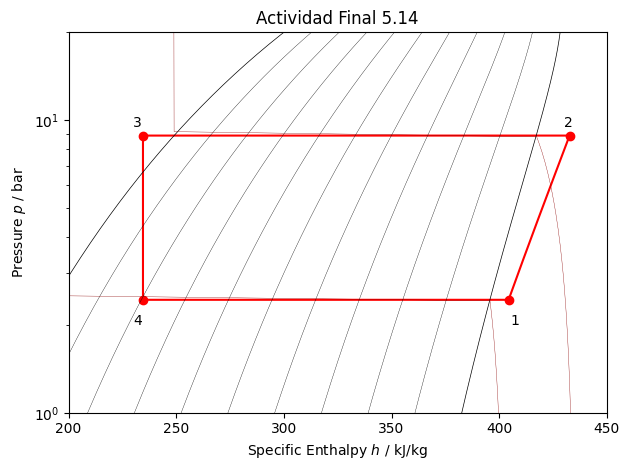

In [13]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleCompressionCycle
from CoolProp.CoolProp import PropsSI
pp = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR')
pp.calc_isolines(CoolProp.iQ, num=11)
Te = -5
Tc = 35
pp.calc_isolines(CoolProp.iT, [Te,Tc], num=2)
cycle = SimpleCompressionCycle('HEOS::R134a', 'PH', unit_system='EUR')
cycle.simple_solve_dt(Te+273.15, Tc+273.15, 10, 10, 1, SI=True)
cycle.steps = 50
sc = cycle.get_state_changes()
import matplotlib.pyplot as plt
plt.close(cycle.figure)
pp.draw_process(sc)
plt.title("Actividad Final 5.14")
plt.xlim(200,450)
plt.ylim(1,20)
plt.text(230,2,"4")
plt.text(405,2,"1")
plt.text(430,9.5,"2")
plt.text(230,9.5,"3")
pp.show()